# Problem 1 : Teams DataFrame Analysis

##### Step 1 : Collecting team stats and cleaning data by removing additional columns and handling null values and NaNs

In [1]:
# Using Teams table for analysis

import pandas as pd
./baseballdatabank-2017.1/core/Teams.csv

teams_df = pd.read_csv('./baseballdatabank-2017.1/core/Teams.csv')

teams_df.yearID.unique() #distinct years for which teams table data is available

array([1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903,
       1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914,
       1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925,
       1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016])

In [2]:
remove_cols = ['lgID','franchID','divID','Ghome','SF','park','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro']

teams_df_cols = teams_df.drop(remove_cols, axis=1)

print(teams_df_cols.isnull().sum(axis=0))

yearID           0
teamID           0
Rank             0
G                0
W                0
L                0
DivWin        1545
WCWin         2181
LgWin           28
WSWin          357
R                0
AB               0
H                0
2B               0
3B               0
HR               0
BB               0
SO             120
SB             144
CS             859
HBP           2325
RA               0
ER               0
ERA              0
CG               0
SHO              0
SV               0
IPouts           0
HA               0
HRA              0
BBA              0
SOA              0
E                0
DP             317
FP               0
name             0
attendance     279
dtype: int64


In [3]:
#Filling null values in Wins, filling NaNs with zeros in most
def fill_null_with_zeros(record):
    return record.fillna(value='0',inplace=True)

fill_null_with_zeros(teams_df_cols['attendance'])
fill_null_with_zeros(teams_df_cols['DivWin'])
fill_null_with_zeros(teams_df_cols['WCWin'])
fill_null_with_zeros(teams_df_cols['LgWin'])
fill_null_with_zeros(teams_df_cols['WSWin'])

# Eliminating columns with null values
teams_df_cols = teams_df_cols.drop(['CS','HBP'], axis=1)

# Filling null values
def fill_null_with_median(record):
    return record.fillna(record.median())

fill_null_with_median(teams_df_cols['SO'])
fill_null_with_median(teams_df_cols['SB'])
fill_null_with_median(teams_df_cols['DP'])

# Print out null values of all columns of `teams_df_cols`
print(teams_df_cols.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 317, 0, 0, 0]


##### Step 2 : Distribution of Wins and Losses 

Min of Wins in teams table: 0
Mean of Wins in teams table: 74.81410934744268
Max of Wins in teams table: 116


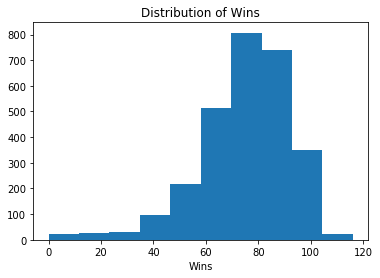

Min of Losses in teams table: 4
Mean of Losses in teams table: 74.81410934744268
Max of Losses in teams table: 134


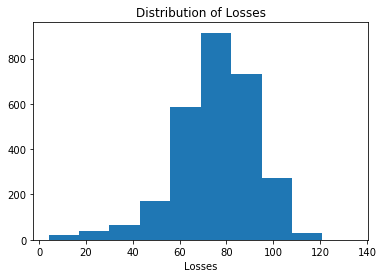

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline

print 'Min of Wins in teams table: {}'.format(`teams_df_cols['W'].min()`)
print 'Mean of Wins in teams table: {}'.format(`teams_df_cols['W'].mean()`)
print 'Max of Wins in teams table: {}'.format(`teams_df_cols['W'].max()`)

# Plotting distribution of wins
plt.hist(teams_df_cols['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

print 'Min of Losses in teams table: {}'.format(`teams_df_cols['L'].min()`)
print 'Mean of Losses in teams table: {}'.format(`teams_df_cols['L'].mean()`)
print 'Max of Losses in teams table: {}'.format(`teams_df_cols['L'].max()`)

plt.hist(teams_df_cols['L'])
plt.xlabel('Losses')
plt.title('Distribution of Losses')

plt.show()

##### Step 3 : Analyzing scatter plot for ditribution of Wins over all years

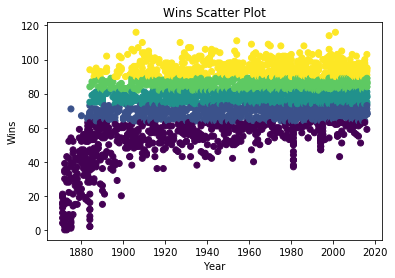

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline

win_bins = pd.qcut(teams_df_cols['W'],5, labels=[1,2,3,4,5])

# Plotting scatter graph of Year vs. Wins 
plt.scatter(teams_df_cols['yearID'], teams_df_cols['W'], c=win_bins)
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [6]:
# Returning the team with maximum wins
print teams_df_cols.loc[teams_df_cols['W'].argmax()]

yearID                1906
teamID                 CHN
Rank                     1
G                      155
W                      116
L                       36
DivWin                   0
WCWin                    0
LgWin                    Y
WSWin                    N
R                      705
AB                    5018
H                     1316
2B                     181
3B                      71
HR                      20
BB                     448
SO                     NaN
SB                     283
RA                     381
ER                     270
ERA                   1.75
CG                     125
SHO                     30
SV                      10
IPouts                4164
HA                    1018
HRA                     12
BBA                    446
SOA                    702
E                      190
DP                     100
FP                    0.97
name          Chicago Cubs
attendance          654300
Name: 467, dtype: object


##### Step 4 : Calculating ERA per game per year for teams and then identifying how this has changed over the years. ERA is considered an important factor to determine the efficiency of a player.

In [7]:
# Filter for rows where 'yearID' is greater than 1950

teams_df_cols = teams_df_cols[teams_df_cols['yearID'] > 1950]

# Create ERA per year and games per year dictionaries

earned_run_avg_per_year = {}
games_per_year = {}

for i, row in teams_df_cols.iterrows():
    year = row['yearID']
    era = row['ERA']
    games = row['G']
    if year in earned_run_avg_per_year:
        earned_run_avg_per_year[year] = earned_run_avg_per_year[year] + era
        games_per_year[year] = games_per_year[year] + games
    else:
        earned_run_avg_per_year[year] = era
        games_per_year[year] = games
        
print(earned_run_avg_per_year)

{1951: 64.71, 1952: 59.26999999999999, 1953: 66.22, 1954: 62.42, 1955: 63.98, 1956: 63.48000000000001, 1957: 61.379999999999995, 1958: 61.76, 1959: 62.529999999999994, 1960: 61.09, 1961: 72.52000000000001, 1962: 79.16000000000001, 1963: 69.2, 1964: 71.68000000000002, 1965: 70.02000000000002, 1966: 70.44000000000001, 1967: 66.11, 1968: 59.66, 1969: 86.65999999999998, 1970: 93.17000000000002, 1971: 83.12999999999998, 1972: 78.21000000000001, 1973: 89.75, 1974: 86.83, 1975: 88.81999999999998, 1976: 84.26, 1977: 103.78, 1978: 95.6, 1979: 103.80999999999997, 1980: 99.72999999999999, 1981: 93.13999999999999, 1982: 100.26, 1983: 100.40000000000003, 1984: 98.96000000000002, 1985: 101.22000000000001, 1986: 103.07000000000001, 1987: 111.39000000000001, 1988: 96.94, 1989: 96.35, 1990: 100.22000000000003, 1991: 101.52000000000001, 1992: 97.21, 1993: 117.1, 1994: 126.24, 1995: 124.52999999999999, 1996: 129.24, 1997: 122.96000000000002, 1998: 133.00999999999996, 1999: 141.11999999999995, 2000: 142.8

In [8]:
# Create era per game (per year) dictionary

era_per_game_per_year = {}
for k, v in games_per_year.items():
    year = k
    games = v
    era_py = earned_run_avg_per_year[year]
    era_per_game_per_year[year] = era_py / games
    
# print(era_per_game_per_year)

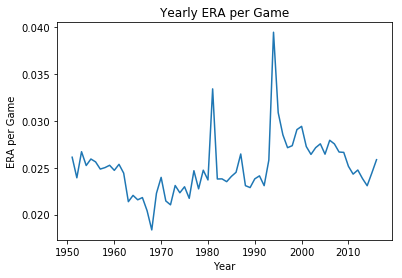

In [9]:
# Create lists from era_per_game_per_year dictionary
lists = sorted(era_per_game_per_year.items())
x, y = zip(*lists)

# Create line plot of Year vs. ERA per game
plt.plot(x, y)
plt.title('Yearly ERA per Game')
plt.xlabel('Year')
plt.ylabel('ERA per Game')

plt.show()

##### Step 5: Calculating stats such as Runs per game, Runs Allowed per game and Home Runs per game. Then we will try to find a correlation between them and plot graphs for comparison.

In [10]:
# Create new features for Runs per Game and Runs Allowed per Game
teams_df_cols['R_per_game'] = teams_df_cols['R'] / teams_df_cols['G']
teams_df_cols['RA_per_game'] = teams_df_cols['RA'] / teams_df_cols['G']
teams_df_cols['HR_per_game'] = teams_df_cols['HR'] / teams_df_cols['G']

In [11]:
teams_corr = teams_df_cols.corr()['W']
print teams_corr['R_per_game':'HR_per_game']

R_per_game     0.471139
RA_per_game   -0.524900
HR_per_game    0.327289
Name: W, dtype: float64


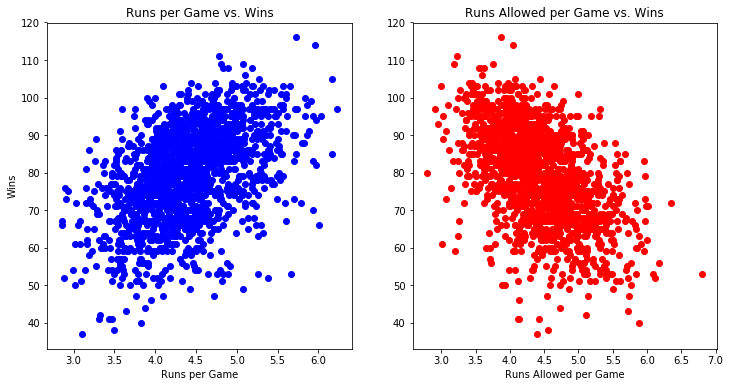

In [12]:
# Create scatter plots for Runs per game vs. wins and runs allowed per game vs. wins
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(teams_df_cols['R_per_game'], teams_df_cols['W'], c='blue')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(teams_df_cols['RA_per_game'], teams_df_cols['W'], c='red')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

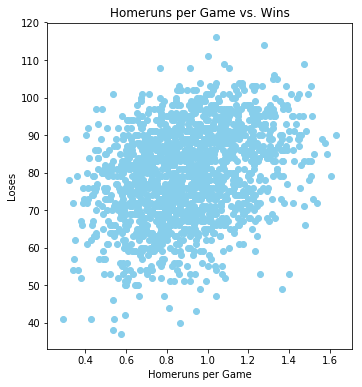

In [13]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)

ax1.scatter(teams_df_cols['HR_per_game'], teams_df_cols['W'], c='skyblue')
ax1.set_title('Homeruns per Game vs. Wins')
ax1.set_ylabel('Loses')
ax1.set_xlabel('Homeruns per Game')

plt.show()

# Problem 2: Batting Performance Evaluation

## Part a - Best Metric Evaluation

### Step 1:
As explained in the report (Step 1) and using following formulas, we will be calculating some metrics here and then we will compare them to evaluate batters performance:

AVG = H/AB

OBP = [(H+BB+HBP)/(AB+BB+HBP+SF)]

TB = [H + 2B + (2 × 3B) + (3 × HR)] 

SLG = TB/AB

TA =  [(TB + BB + HBP + SB – CS)/(AB – H + CS + GIDP)]

OPS = SLG + OBP

RC = (H + BB) x (Total bases)/[AB + BB]

For more details, please refer report

In [14]:
import numpy as np
import pandas as pd

#Batting table analysis

batting_df = pd.read_csv('./baseballdatabank-2017.1/core/Batting.csv')

#Calculating metrics as above and adding the newly calculated metric to the batting dataframe

# On base Percentage:

batting_df['OBP'] = (batting_df['H']+batting_df['BB']+batting_df['HBP'])/(batting_df['AB']+
                                        batting_df['BB']+batting_df['HBP']+batting_df['SF'])

# Total Bases:

batting_df['TB'] = batting_df['H']+batting_df['2B']+(2*batting_df['3B'])+(3*batting_df['HR'])

# Slugging Percentage:

batting_df['SLG'] = batting_df['TB']/batting_df['AB']

# Total Average

batting_df['TA'] = (batting_df['TB']+batting_df['BB']+batting_df['HBP']
                    +batting_df['SB']-batting_df['CS'])/ (batting_df['AB']
                    -batting_df['H']+batting_df['CS']+batting_df['GIDP'])

###################################################################
#Finally calculating the three major statistics AVG, OPS and RC:
###################################################################

# AVG:

batting_df['AVG'] = batting_df['H']/batting_df['AB']

# OPS: Sum of SLG and OBP

batting_df['OPS'] = batting_df['SLG']+batting_df['OBP']

# RC: 
batting_df['RC'] = ((batting_df['H'] + batting_df['BB'])*(batting_df['TB']))/(batting_df['AB'] 
                                                                        + batting_df['BB'])



In [15]:
print batting_df['TA'].isnull().any() # Identifying if the newly calculated field has any NaNs
# As this returns True, we use fillna function to replace NaNs with 0

True


In [16]:
batting_df.fillna(0, inplace=True) 

print batting_df.head()

    playerID  yearID  stint teamID lgID   G   AB   R   H  2B    ...       SH  \
0  abercda01    1871      1    TRO    0   1    4   0   0   0    ...      0.0   
1   addybo01    1871      1    RC1    0  25  118  30  32   6    ...      0.0   
2  allisar01    1871      1    CL1    0  29  137  28  40   4    ...      0.0   
3  allisdo01    1871      1    WS3    0  27  133  28  44  10    ...      0.0   
4  ansonca01    1871      1    RC1    0  25  120  29  39  11    ...      0.0   

    SF  GIDP  OBP  TB       SLG   TA       AVG  OPS         RC  
0  0.0   0.0  0.0   0  0.000000  0.0  0.000000  0.0   0.000000  
1  0.0   0.0  0.0  38  0.322034  0.0  0.271186  0.0  11.213115  
2  0.0   0.0  0.0  54  0.394161  0.0  0.291971  0.0  16.316547  
3  0.0   0.0  0.0  64  0.481203  0.0  0.330827  0.0  21.172932  
4  0.0   0.0  0.0  56  0.466667  0.0  0.325000  0.0  18.819672  

[5 rows x 29 columns]


### Step 2:

As per Step 2, stated in report, here we will find out the correlation between the three major metrics - AVG, OPS and RC and Homeruns hit by a batter

In [17]:
#Finding correlation between all above calculated metrics

def correlation_metrics(metric1, metric2):
    '''
    Define a function to calculate correlation between variables. 
    However, here we could have used the in-built corr() function but we are looking for
    only 3 comparisons, we can continue to use this function
    ''' 
    metric_1_std = (metric1-metric1.mean()) / metric1.std(ddof=0)
    metric_2_std = (metric2-metric2.mean()) / metric2.std(ddof=0)
    
    correlation = (metric_1_std*metric_2_std).mean()
    
    return correlation

homeruns = batting_df['HR']
average = batting_df['AVG']
on_base_plus_slug = batting_df['OPS']
runs_created = batting_df['RC']

# df_corr = batting_df[['HR','AVG','OPS','RC']].corr()

print 'Correlation between homeruns and average: {}'.format(`correlation_metrics(homeruns,average)`)
print 'Correlation between homeruns and on_base_plus_slug: {}'.format(`correlation_metrics(homeruns,on_base_plus_slug)`)
print 'Correlation between homeruns and runs_created: {}'.format(`correlation_metrics(homeruns,runs_created)`)


Correlation between homeruns and average: 0.31667851920192336
Correlation between homeruns and on_base_plus_slug: 0.4381493419248805
Correlation between homeruns and runs_created: 0.8149748818841528


### Step 3 :

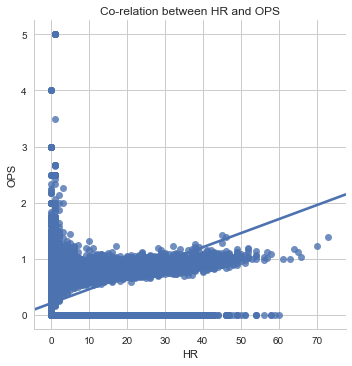

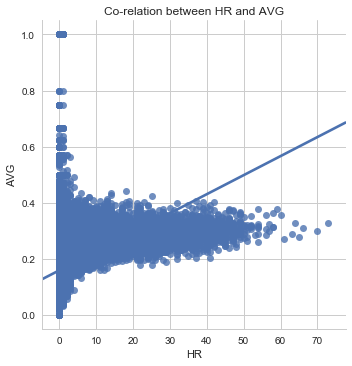

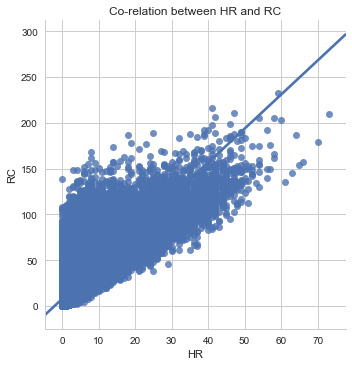

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid") 

%matplotlib inline

# Plot between HR and OPS

plotrec = sns.lmplot("HR","OPS",data=batting_df,fit_reg = True, ci=None)
sns.plt.title("Co-relation between HR and OPS")
sns.plt.show() 

# Plot between HR and AVG

plotrec = sns.lmplot("HR","AVG",data=batting_df,fit_reg = True, ci=None)
sns.plt.title("Co-relation between HR and AVG")
sns.plt.show() 

# Plot between HR and RC

plotrec = sns.lmplot("HR","RC",data=batting_df,fit_reg = True, ci=None)
sns.plt.title("Co-relation between HR and RC")
sns.plt.show() 

## Part b - Correlation between Batting metric and Salary

##### Step 1 : Selecting Batting data for period from 2007 to 2016 and further filtering players who have played more than 25 games for standardizing all other calculations. After that, we will merge this data with the corresponding salary data to identify how batting stats affect salary of a player

In [19]:
# Salaries table for players
import numpy as np
import pandas as pd

salaries_df = pd.read_csv('./baseballdatabank-2017.1/core/Salaries.csv')

# Selecting the period of analysis of 10 years - 2007 to 2016
batting_df_07_16 = batting_df[batting_df['yearID']>=2007]

# For consistency, selecting players who have played more than 25 games
print len(batting_df_07_16[batting_df_07_16['G']>=25])
batting_df_07_16 = batting_df_07_16[batting_df_07_16['G']>=25]

#Also, making sure to take into account only the players who have played in all 10 years

def players_07_to_16_years(records):
    
    # First create a list with all of the playerIDs (many will be repeated) in the playerID column of the DataFrame
    list_ID = list(records['playerID'])
    players_10_years = set()
    
    # Iterate through the list of IDs and count how many times a given ID occurs in the list
    # This will correspond to the number of entries that player has in batting_df
    for player in list_ID:
        if (list_ID.count(player)) == 10:
            players_10_years.add(player)
    
    # Return a modified DataFrame that only includes players with records in every year in the range of years 07-16
    return records[records['playerID'].isin(players_10_years)]

# Create the new DataFrames including only players with records in years in the analysis
batting_df_07_16_clean = players_07_to_16_years(batting_df_07_16)
print len(batting_df_07_16_clean)

player_salaries = batting_df_07_16_clean.merge(salaries_df, on=['playerID','yearID','teamID','lgID'], how='inner')

print len(player_salaries)

player_salaries = player_salaries.set_index(['yearID', 'playerID'])
print player_salaries.head(2)

8541
730
636
                  stint teamID lgID    G   AB   R    H  2B  3B  HR    ...     \
yearID playerID                                                       ...      
2007   bautijo02      1    PIT   NL  142  532  75  135  36   2  15    ...      
       beltrad01      1    SEA   AL  149  595  87  164  41   2  26    ...      

                   SF  GIDP       OBP   TB       SLG        TA       AVG  \
yearID playerID                                                            
2007   bautijo02  6.0  16.0  0.339344  220  0.413534  0.709135  0.253759   
       beltrad01  4.0  18.0  0.319249  287  0.482353  0.751663  0.275630   

                       OPS         RC    salary  
yearID playerID                                  
2007   bautijo02  0.752878  74.433333    397500  
       beltrad01  0.801602  91.586098  12900000  

[2 rows x 28 columns]


##### Step 2 : Calculating correlation between salary and important batting metrics. Also plotting a graph for visualization.

In [20]:
df_corr = player_salaries[['salary','AVG','OPS','RC']].corr()
print df_corr.loc['AVG':'RC', 'salary']

AVG    0.144177
OPS    0.145258
RC     0.300589
Name: salary, dtype: float64


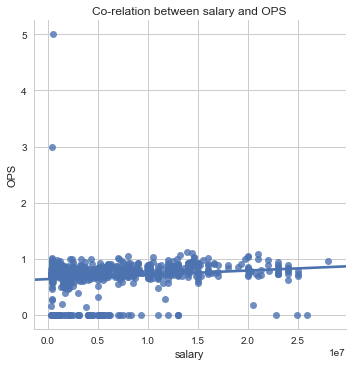

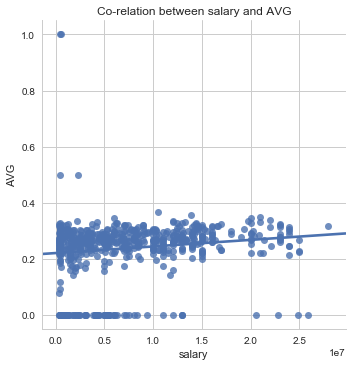

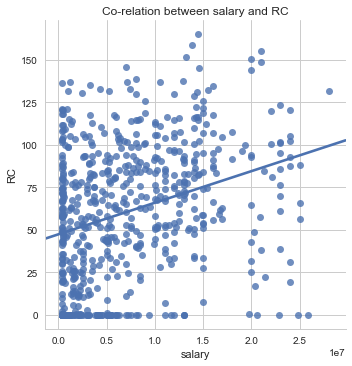

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid") 

%matplotlib inline

plotrec = sns.lmplot("salary","OPS",data=player_salaries,fit_reg = True, ci=None)
sns.plt.title("Co-relation between salary and OPS")
sns.plt.show() 

plotrec = sns.lmplot("salary","AVG",data=player_salaries,fit_reg = True, ci=None)
sns.plt.title("Co-relation between salary and AVG")
sns.plt.show() 

plotrec = sns.lmplot("salary","RC",data=player_salaries,fit_reg = True, ci=None)
sns.plt.title("Co-relation between salary and RC")
sns.plt.show() 

##### Step 3 : Observing distribution of Salary 

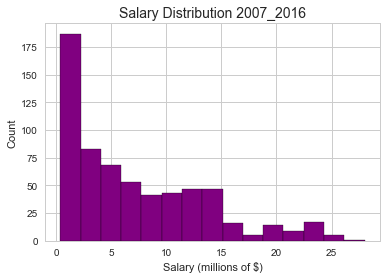

In [22]:
plt.hist((player_salaries['salary']/1e6), bins=15, color='purple', edgecolor='black')
plt.xlabel('Salary (millions of $)'), plt.ylabel('Count')
plt.title('Salary Distribution 2007_2016', size = 14);

# Problem 3 : Association between 4 dataframes

##### Step 1 :  Loading the pitching, fielding, awards and appearances dataframes

In [23]:
# Import data to DataFrames
import pandas as pd

# Read in the CSV files
# Using pitching, fielding, awards and appearances

pitching_df = pd.read_csv('./baseballdatabank-2017.1/core/Pitching.csv',usecols=['playerID','yearID','teamID','W','L','G','SV','IPouts','H','ER','HR','BB','SO','ERA','HBP','R','GIDP'])
fielding_df = pd.read_csv('./baseballdatabank-2017.1/core/Fielding.csv',usecols=['playerID','yearID','teamID','G','E','ZR'])
awards_df = pd.read_csv('./baseballdatabank-2017.1/core/AwardsPlayers.csv',usecols=['playerID','awardID','yearID'])
appearances_df = pd.read_csv('./baseballdatabank-2017.1/core/Appearances.csv',usecols=['yearID','teamID','playerID','G_all','G_batting','G_defense','G_p','G_c','G_lf','G_c','G_rf']) 


##### Step 2 : Analyzing Pitching Dataframe and creating a consolidated dataframe for analysis

In [24]:
# Creating a new empty data frame so that we can collect stats from above tables and get a consolidated table for all references
player_stats_df = pd.DataFrame()

# Collecting player stats from `pitching_df` and `fielding_df`
# Removing yearID from calculation below as it also numeric field but their sum is not needed: Instead we will perform count of this col

pitching_stats_df = pitching_df.drop(['yearID'], axis=1)
fielding_stats_df = fielding_df.drop(['yearID'], axis=1)

# Consolidated Pitching and Fielding stats: Sum of all Numeric Fields
pitching_stats_cons = pitching_stats_df.groupby(['playerID']).sum()
fielding_stats_cons = fielding_stats_df.groupby(['playerID']).sum()

print 'Pitching Consolidated Stats'
print ''
print pitching_stats_cons.head()
print ''
print 'Fielding Consolidated Stats'
print ''
print fielding_stats_cons.head()


Pitching Consolidated Stats

            W   L    G  SV  IPouts     H   ER  HR   BB   SO    ERA   HBP    R  \
playerID                                                                        
aardsda01  16  18  331  69    1011   296  160  41  183  340  46.75  16.0  169   
aasedo01   66  60  448  82    3328  1085  468  89  457  641  45.41   7.0  503   
abadfe01    6  26  315   1     822   260  113  36   99  234  33.36  11.0  119   
abbeybe01  22  40   79   1    1704   686  285  18  192  161  28.07   0.0  442   
abbeych01   0   0    1   0       6     6    1   0    0    0   4.50   0.0    3   

           GIDP  
playerID         
aardsda01  21.0  
aasedo01    NaN  
abadfe01   18.0  
abbeybe01   NaN  
abbeych01   NaN  

Fielding Consolidated Stats

              G      E  ZR
playerID                  
aardsda01   331    3.0 NaN
aaronha01  3020  144.0 NaN
aaronto01   387   22.0 NaN
aasedo01    448   13.0 NaN
abadan01      9    1.0 NaN


In [25]:
# Calculating total count of years where player played as a pitcher and also as a fielder separately

pitching_df['total_years_pitcher'] = pitching_df.groupby('playerID')['yearID'].transform('count')
fielding_df['total_years_fielder'] = fielding_df.groupby('playerID')['yearID'].transform('count')

# Resetting index of pitching_stats_cons and fielding_stats_cons so as to be able to add total_years_pitcher and total_years_fielder respectively
pitching_stats_cons.reset_index(level=0, inplace=True) 
fielding_stats_cons.reset_index(level=0, inplace=True)

print 'Pitching Stats'
print ''
print pitching_df.head()
print ''
print 'Fielding Stats'
print ''
print pitching_df.head()

Pitching Stats

    playerID  yearID teamID   W   L   G  SV  IPouts    H   ER  HR  BB  SO  \
0  bechtge01    1871    PH1   1   2   3   0      78   43   23   0  11   1   
1  brainas01    1871    WS3  12  15  30   0     792  361  132   4  37  13   
2  fergubo01    1871    NY2   0   0   1   0       3    8    3   0   0   0   
3  fishech01    1871    RC1   4  16  24   0     639  295  103   3  31  15   
4  fleetfr01    1871    NY2   0   1   1   0      27   20   10   0   3   0   

     ERA  HBP    R  GIDP  total_years_pitcher  
0   7.96  NaN   42   NaN                    5  
1   4.50  NaN  292   NaN                    5  
2  27.00  NaN    9   NaN                    6  
3   4.35  NaN  257   NaN                    7  
4  10.00  NaN   21   NaN                    4  

Fielding Stats

    playerID  yearID teamID   W   L   G  SV  IPouts    H   ER  HR  BB  SO  \
0  bechtge01    1871    PH1   1   2   3   0      78   43   23   0  11   1   
1  brainas01    1871    WS3  12  15  30   0     792  361  132 

In [26]:
# Adding the above calculated total_years_pitcher and total_years_fielder

dp = pitching_df.set_index('playerID')['total_years_pitcher'].to_dict()
df = fielding_df.set_index('playerID')['total_years_fielder'].to_dict()

pitching_stats_cons['total_years_pitcher'] = pitching_stats_cons['playerID'].map(dp)
fielding_stats_cons['total_years_fielder'] = fielding_stats_cons['playerID'].map(df)

print 'Pitching Consolidated Stats'
print ''
print pitching_stats_cons.head()
print ''
print 'Fielding Consolidated Stats'
print ''
print fielding_stats_cons.head()

# Pitching and fielding stats collection complete

Pitching Consolidated Stats

    playerID   W   L    G  SV  IPouts     H   ER  HR   BB   SO    ERA   HBP  \
0  aardsda01  16  18  331  69    1011   296  160  41  183  340  46.75  16.0   
1   aasedo01  66  60  448  82    3328  1085  468  89  457  641  45.41   7.0   
2   abadfe01   6  26  315   1     822   260  113  36   99  234  33.36  11.0   
3  abbeybe01  22  40   79   1    1704   686  285  18  192  161  28.07   0.0   
4  abbeych01   0   0    1   0       6     6    1   0    0    0   4.50   0.0   

     R  GIDP  total_years_pitcher  
0  169  21.0                    9  
1  503   NaN                   13  
2  119  18.0                    8  
3  442   NaN                    6  
4    3   NaN                    1  

Fielding Consolidated Stats

    playerID     G      E  ZR  total_years_fielder
0  aardsda01   331    3.0 NaN                    9
1  aaronha01  3020  144.0 NaN                   36
2  aaronto01   387   22.0 NaN                   18
3   aasedo01   448   13.0 NaN                 

In [27]:
# Entering all the pitching stats calculated to player_stats_df - where everything else will also be consolidated

player_stats_df = pitching_stats_cons.copy()

# Merge player_stats_df and fielding dataframes now 
player_stats_df = player_stats_df.merge(fielding_stats_cons, on='playerID', how='inner',
                                             suffixes=('_pitcher','_fielder'))

# Final columns in player_stats_df
print player_stats_df.columns

Index([u'playerID', u'W', u'L', u'G_pitcher', u'SV', u'IPouts', u'H', u'ER',
       u'HR', u'BB', u'SO', u'ERA', u'HBP', u'R', u'GIDP',
       u'total_years_pitcher', u'G_fielder', u'E', u'ZR',
       u'total_years_fielder'],
      dtype='object')


##### Step 3 :  Analyzing Awards Dataframe and calculating the total awards to consolidate with the player_stats_df

In [28]:
awards_stats_df = awards_df.drop(['yearID','awardID'], axis=1)

#Consolidated Pitching stats:
awards_stats_df = awards_stats_df.groupby(['playerID']).sum()
# Nothing will be consolidated as there are no numeric fields, but we will get unique playerIDs as index from this step, which is required for further analysis

In [29]:
# Calculating total_awards won by a player and the number of years in which they were awarded
awards_df['total_awards'] = awards_df.groupby('playerID')['awardID'].transform('count')

In [30]:
print 'Awards df'
print ''
print awards_df.head()
print ''
print 'Player Stats'
print ''
print player_stats_df.head()
print ''
print 'Length of Awards Stats'
print ''
print len(awards_df)
print ''
print 'Length of Player Stats'
print ''
print len(player_stats_df)

Awards df

    playerID                awardID  yearID  total_awards
0   bondto01  Pitching Triple Crown    1877             1
1  hinespa01           Triple Crown    1878             1
2  heckegu01  Pitching Triple Crown    1884             1
3  radboch01  Pitching Triple Crown    1884             1
4  oneilti01           Triple Crown    1887             1

Player Stats

    playerID   W   L  G_pitcher  SV  IPouts     H   ER  HR   BB   SO    ERA  \
0  aardsda01  16  18        331  69    1011   296  160  41  183  340  46.75   
1   aasedo01  66  60        448  82    3328  1085  468  89  457  641  45.41   
2   abadfe01   6  26        315   1     822   260  113  36   99  234  33.36   
3  abbeybe01  22  40         79   1    1704   686  285  18  192  161  28.07   
4  abbeych01   0   0          1   0       6     6    1   0    0    0   4.50   

    HBP    R  GIDP  total_years_pitcher  G_fielder     E  ZR  \
0  16.0  169  21.0                    9        331   3.0 NaN   
1   7.0  503   NaN     

In [31]:
# merging it with player stats

print 'Player Stats Columns'
print ''
print player_stats_df.columns
print ''
print 'Awards Columns'
print ''
print awards_df.columns

player_stats_df = player_stats_df.merge(awards_df, on='playerID', how='left')

print 'Post merging Player Stats Columns'
print ''
print player_stats_df.columns
print ''
print 'Length of player stats'
print len(player_stats_df)

Player Stats Columns

Index([u'playerID', u'W', u'L', u'G_pitcher', u'SV', u'IPouts', u'H', u'ER',
       u'HR', u'BB', u'SO', u'ERA', u'HBP', u'R', u'GIDP',
       u'total_years_pitcher', u'G_fielder', u'E', u'ZR',
       u'total_years_fielder'],
      dtype='object')

Awards Columns

Index([u'playerID', u'awardID', u'yearID', u'total_awards'], dtype='object')
Post merging Player Stats Columns

Index([u'playerID', u'W', u'L', u'G_pitcher', u'SV', u'IPouts', u'H', u'ER',
       u'HR', u'BB', u'SO', u'ERA', u'HBP', u'R', u'GIDP',
       u'total_years_pitcher', u'G_fielder', u'E', u'ZR',
       u'total_years_fielder', u'awardID', u'yearID', u'total_awards'],
      dtype='object')

Length of player stats
10787


##### Step 4 :  Analyzing appearances dataframe and merging all the data together to player_stats_df

In [32]:
# We need to sum up all values for all players : except for year

appearances_stats_df = appearances_df.drop(['yearID'], axis=1)

#Consolidated Appearances stats:
appearances_stats_cons = appearances_stats_df.groupby(['playerID']).sum()
print appearances_stats_cons.head()

# There are no duplicates in appearances_stats_cons dataframe: to check uncomment below
# print appearances_stats_cons[appearances_stats_cons.duplicated()]

           G_all  G_batting  G_defense  G_p  G_c  G_lf  G_rf
playerID                                                    
aardsda01    331        139        331  331    0     0     0
aaronha01   3298       3298       2985    0    0   315  2174
aaronto01    437        437        346    0    0   135     2
aasedo01     448         81        448  448    0     0     0
abadan01      15         15          9    0    0     0     1


In [33]:
# For year we will create separate columns to identify period
# Dividing year into different buckets starting from before1950 to 2016:

appearances_df['G_all_bef_50'] = appearances_df[(appearances_df['yearID']<1950)].groupby('playerID')['G_all'].transform('sum')
appearances_df['G_all_50_65'] = appearances_df[(appearances_df['yearID']>=1950) & (appearances_df['yearID']<=1965)].groupby('playerID')['G_all'].transform('sum')
appearances_df['G_all_66_76'] = appearances_df[(appearances_df['yearID']>=1966) & (appearances_df['yearID']<=1976)].groupby('playerID')['G_all'].transform('sum')
appearances_df['G_all_77_86'] = appearances_df[(appearances_df['yearID']>=1977) & (appearances_df['yearID']<=1986)].groupby('playerID')['G_all'].transform('sum')
appearances_df['G_all_87_95'] = appearances_df[(appearances_df['yearID']>=1987) & (appearances_df['yearID']<=1995)].groupby('playerID')['G_all'].transform('sum')
appearances_df['G_all_96_2002'] = appearances_df[(appearances_df['yearID']>=1996) & (appearances_df['yearID']<=2002)].groupby('playerID')['G_all'].transform('sum')
appearances_df['G_all_2003_10'] = appearances_df[(appearances_df['yearID']>=2003) & (appearances_df['yearID']<=2010)].groupby('playerID')['G_all'].transform('sum')
appearances_df['G_all_2011_16'] = appearances_df[(appearances_df['yearID']>=2011) & (appearances_df['yearID']<=2016)].groupby('playerID')['G_all'].transform('sum')

# Resetting index of appearances_stats_cons so as to be able to add above calculated metrics
appearances_stats_cons.reset_index(level=0, inplace=True) 

print appearances_stats_cons.head() 

    playerID  G_all  G_batting  G_defense  G_p  G_c  G_lf  G_rf
0  aardsda01    331        139        331  331    0     0     0
1  aaronha01   3298       3298       2985    0    0   315  2174
2  aaronto01    437        437        346    0    0   135     2
3   aasedo01    448         81        448  448    0     0     0
4   abadan01     15         15          9    0    0     0     1


In [34]:
# Adding these to the appearances_stats_cons dataframe for all appearances data

def add_param_to_appearance_stats(param):
    d_app = appearances_df.set_index('playerID')[param].to_dict()
    appearances_stats_cons[param] = appearances_stats_cons['playerID'].map(d_app)
    
add_param_to_appearance_stats('G_all_bef_50')
add_param_to_appearance_stats('G_all_50_65')
add_param_to_appearance_stats('G_all_66_76')
add_param_to_appearance_stats('G_all_77_86')
add_param_to_appearance_stats('G_all_87_95')
add_param_to_appearance_stats('G_all_96_2002')
add_param_to_appearance_stats('G_all_2003_10')
add_param_to_appearance_stats('G_all_2011_16')

print appearances_stats_cons.head()

    playerID  G_all  G_batting  G_defense  G_p  G_c  G_lf  G_rf  G_all_bef_50  \
0  aardsda01    331        139        331  331    0     0     0           NaN   
1  aaronha01   3298       3298       2985    0    0   315  2174           NaN   
2  aaronto01    437        437        346    0    0   135     2           NaN   
3   aasedo01    448         81        448  448    0     0     0           NaN   
4   abadan01     15         15          9    0    0     0     1           NaN   

   G_all_50_65  G_all_66_76  G_all_77_86  G_all_87_95  G_all_96_2002  \
0          NaN          NaN          NaN          NaN            NaN   
1          NaN       1492.0          NaN          NaN            NaN   
2          NaN        216.0          NaN          NaN            NaN   
3          NaN          NaN          NaN        123.0            NaN   
4          NaN          NaN          NaN          NaN            NaN   

   G_all_2003_10  G_all_2011_16  
0            NaN           77.0  
1           

In [35]:
# Create a list from the columns of appearances_stats_cons; also adding the new columns to the consolidated dataframe
appearances_all_percent = pd.DataFrame()

app_cols_list = appearances_stats_cons.columns.tolist()
remove_list = ['index','playerID','G_all']
final_list= list(set(app_cols_list).difference(set(remove_list)))

# Loop through the list and divide each column by the players total games played
for col in final_list:
    column = col + '_percent'
    if column not in appearances_all_percent.columns.tolist():
        appearances_all_percent[column] = appearances_stats_cons[col].div(appearances_stats_cons['G_all'], axis=0) 
        appearances_stats_cons[column] = appearances_all_percent[column]
print appearances_all_percent.columns
print appearances_stats_cons.columns


Index([u'G_rf_percent', u'G_all_96_2002_percent', u'G_all_2003_10_percent',
       u'G_batting_percent', u'G_all_66_76_percent', u'G_p_percent',
       u'G_all_50_65_percent', u'G_all_2011_16_percent', u'G_lf_percent',
       u'G_c_percent', u'G_defense_percent', u'G_all_87_95_percent',
       u'G_all_bef_50_percent', u'G_all_77_86_percent'],
      dtype='object')
Index([u'playerID', u'G_all', u'G_batting', u'G_defense', u'G_p', u'G_c',
       u'G_lf', u'G_rf', u'G_all_bef_50', u'G_all_50_65', u'G_all_66_76',
       u'G_all_77_86', u'G_all_87_95', u'G_all_96_2002', u'G_all_2003_10',
       u'G_all_2011_16', u'G_rf_percent', u'G_all_96_2002_percent',
       u'G_all_2003_10_percent', u'G_batting_percent', u'G_all_66_76_percent',
       u'G_p_percent', u'G_all_50_65_percent', u'G_all_2011_16_percent',
       u'G_lf_percent', u'G_c_percent', u'G_defense_percent',
       u'G_all_87_95_percent', u'G_all_bef_50_percent',
       u'G_all_77_86_percent'],
      dtype='object')


In [36]:
# Merging appearances data to player_stats_df: Run this block onnly once

final_stats = player_stats_df.merge(appearances_stats_cons, on='playerID', how='inner', suffixes=('_plyr','_app'))

final_stats.head() # Should have 52 columns as per the dataframes loaded

,playerID,W,L,G_pitcher,SV,IPouts,H,ER,HR,BB,...,G_all_66_76_percent,G_p_percent,G_all_50_65_percent,G_all_2011_16_percent,G_lf_percent,G_c_percent,G_defense_percent,G_all_87_95_percent,G_all_bef_50_percent,G_all_77_86_percent
0,aardsda01,16,18,331,69,1011,296,160,41,183,...,NaN,1.000000,NaN,0.232628,0.00000,0.0,1.0,NaN,NaN,NaN
1,aasedo01,66,60,448,82,3328,1085,468,89,457,...,NaN,1.000000,NaN,NaN,0.00000,0.0,1.0,0.274554,NaN,NaN
2,abadfe01,6,26,315,1,822,260,113,36,99,...,NaN,1.000000,NaN,0.930159,0.00000,0.0,1.0,NaN,NaN,NaN
3,abbeybe01,22,40,79,1,1704,686,285,18,192,...,NaN,1.000000,NaN,NaN,0.00000,0.0,1.0,NaN,1.0,NaN
4,abbeych01,0,0,1,0,6,6,1,0,0,...,NaN,0.002212,NaN,NaN,0.20354,0.0,1.0,NaN,1.0,NaN


##### Step 5 :  Handling Missing data and NaNs

In [37]:
# Fill null values in numeric columns with 0 
fill_cols = ['ERA', 'HBP', 'GIDP', 'E', 'ZR', 'total_awards', 'G_all_bef_50', 'G_all_50_65','G_all_66_76','G_all_77_86','G_all_87_95','G_all_96_2002','G_all_2003_10','G_all_2011_16','G_all_96_2002_percent','G_all_2003_10_percent','G_batting_percent','G_all_66_76_percent','G_p_percent','G_all_50_65_percent','G_all_2011_16_percent','G_lf_percent','G_c_percent','G_defense_percent','G_all_87_95_percent','G_all_bef_50_percent','G_all_77_86_percent']

for col in fill_cols:
    final_stats[col] = final_stats[col].fillna(0)

# Drop any additional rows with null values
final_stats = final_stats.dropna()

# Check to make sure null values have been removed
print(final_stats.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


##### Step 6 :  Comparing distributions of total_awards, Hits, Home Runs and total games

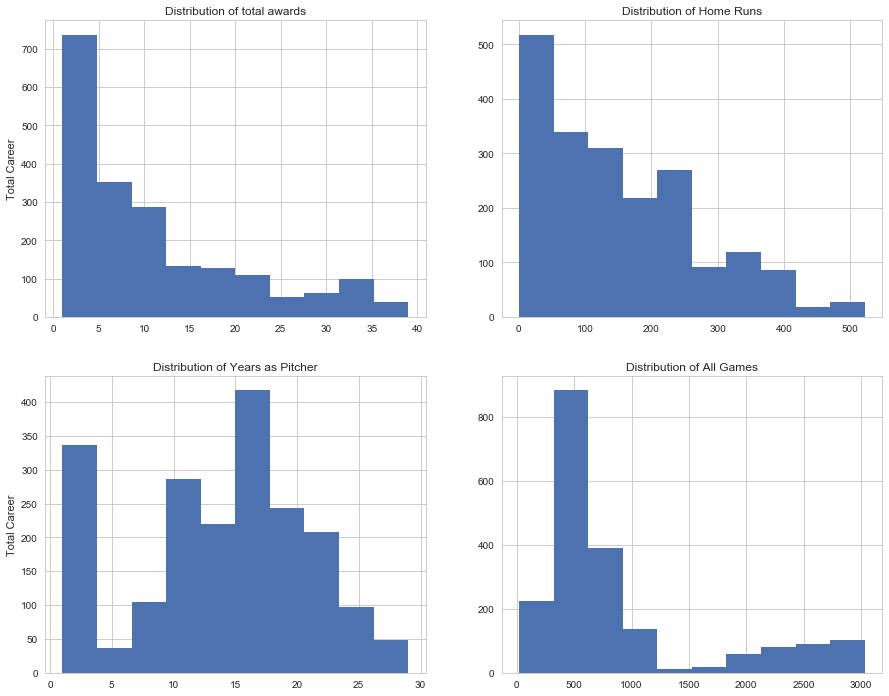

In [38]:
# Import the `pyplot` module from `matplotlib`
 
import matplotlib.pyplot as plt

# Initializing the figure and add subplots
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# Create distribution plots for Hits, Home Runs, Years Played and All Star Games
ax1.hist(final_stats['total_awards'])
ax1.set_title('Distribution of total awards')
ax1.set_ylabel('Total Career')
ax2.hist(final_stats['HR'])
ax2.set_title('Distribution of Home Runs')
ax3.hist(final_stats['total_years_pitcher'])
ax3.set_title('Distribution of Years as Pitcher')
ax3.set_ylabel('Total Career')
ax4.hist(final_stats['G_all'])
ax4.set_title('Distribution of All Games')

# Show the plot
plt.show()

##### Step 8 :  Plotting the stats to depict which the mean appearance of any player in all games played

In [39]:
G_batting_percent_mean = (final_stats['G_batting_percent']*100).mean()
G_defense_percent_mean = (final_stats['G_defense_percent']*100).mean()
G_p_percent_mean = (final_stats['G_p_percent']*100).mean()
G_rf_percent_mean = (final_stats['G_rf_percent']*100).mean()
G_lf_percent_mean = (final_stats['G_lf_percent']*100).mean()
G_c_percent_mean = (final_stats['G_c_percent']*100).mean()

G_mean_plot = [G_batting_percent_mean, G_defense_percent_mean, G_p_percent_mean, 
               G_rf_percent_mean, G_lf_percent_mean, G_c_percent_mean]

print G_mean_plot

[82.04661389829407, 96.5623960226708, 78.05386745355972, 3.3129949652325834, 3.5790894471558117, 0.40925880305983325]


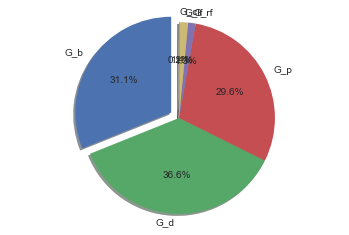

In [40]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
label = 'G_b', 'G_d', 'G_p', 'G_rf', 'G_lf', 'G_c'
plot_data = [G_batting_percent_mean, G_defense_percent_mean, G_p_percent_mean, 
             G_rf_percent_mean, G_lf_percent_mean, G_c_percent_mean]
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'batting_percent_mean')

fig1, ax1 = plt.subplots()
ax1.pie(plot_data, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


##### Step 9 :  Comparing the Wins and Losses against all the games played for players who won awards

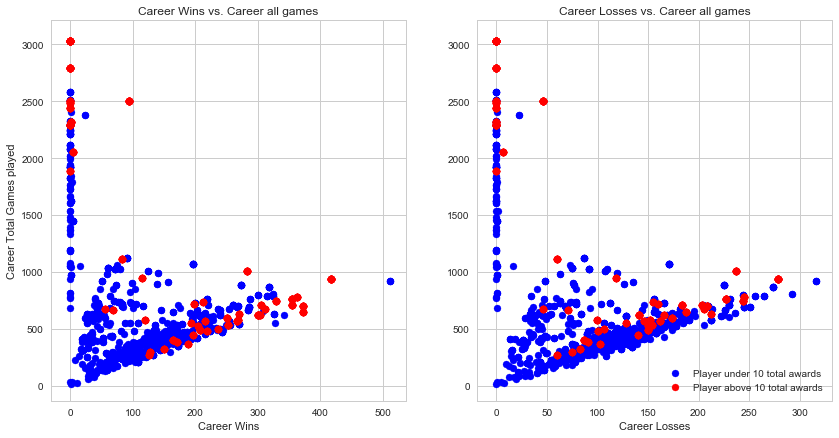

In [41]:
# Filter `df` for players with 10 or more awards in total

df_award_lt_10 = final_stats[final_stats['total_awards']<10]
df_award_gt_10 = final_stats[final_stats['total_awards']>=10]

# Inithttp://localhost:8888/notebooks/Data_Analysis/Part%202%20Intro%20to%20Data%20Analysis/Project%20-%20Investigate%20a%20Dataset/Project%20-%20Investigate%20a%20Dataset%20-%20full%20and%20final.ipynb#ialize the figure and add subplots
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# hw and Hrw

# Create Scatter plots for Wins vs. Total_Awards and Losses vs. Total_Awards
ax1.scatter(df_award_lt_10['W'], df_award_lt_10['G_all'], c='b', label='Player under 10 total awards')
ax1.scatter(df_award_gt_10['W'], df_award_gt_10['G_all'], c='r', label='Player above 10 total awards')
ax1.set_title('Career Wins vs. Career all games')
ax1.set_xlabel('Career Wins')
ax1.set_ylabel('Career Total Games played')
ax2.scatter(df_award_lt_10['L'], df_award_lt_10['G_all'], c='b', label='Player under 10 total awards')
ax2.scatter(df_award_gt_10['L'], df_award_gt_10['G_all'], c='r', label='Player above 10 total awards')
ax2.set_title('Career Losses vs. Career all games')
ax2.set_xlabel('Career Losses')
ax2.legend(loc='lower right', scatterpoints=1)

# Show the plot
plt.show()